In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sales = pd.read_csv('/content/EconomiesOfScale.csv')
sales.head(30)

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
5,1.307435,100.000000
6,1.339386,94.759756
7,1.379044,67.185383
8,1.420000,72.886041
9,1.473948,61.967696


In [ ]:
sales.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
sales.isnull().sum()

Number of Units       0
Manufacturing Cost    0
dtype: int64

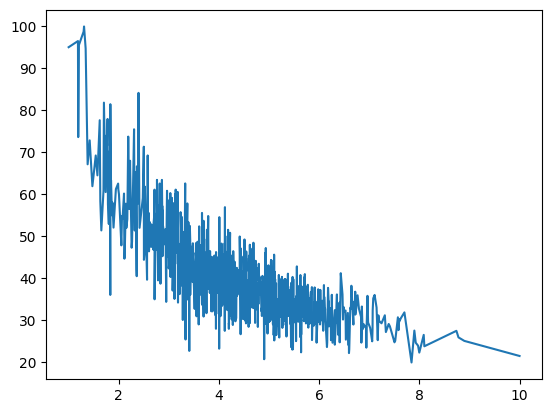

In [ ]:
plt.plot(sales['Number of Units'],sales['Manufacturing Cost'])

In [ ]:
x_train = sales[['Number of Units']]
y_train = sales['Manufacturing Cost']
x_train.shape
y_train.shape

(1000,)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(x_train,y_train)

LinearRegression()

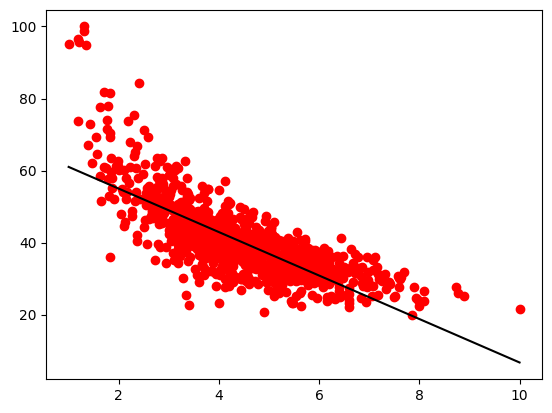

In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,reg.predict(x_train),color='black')

In [ ]:
a = 2
y = reg.predict(np.array(a).reshape(-1,1))
y

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54.97230533])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
x_columns = poly_reg.fit_transform(x_train)
x_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.18599365e+00, 1.40658094e+00, 1.66819606e+00,
        1.97846993e+00, 2.34645277e+00],
       [1.00000000e+00, 1.19149864e+00, 1.41966901e+00, 1.69153369e+00,
        2.01546010e+00, 2.40141796e+00],
       ...,
       [1.00000000e+00, 8.78088812e+00, 7.71039962e+01, 6.77041565e+02,
        5.94502623e+03, 5.22026103e+04],
       [1.00000000e+00, 8.89769971e+00, 7.91690601e+01, 7.04422522e+02,
        6.26774007e+03, 5.57684690e+04],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03,
        1.00000000e+04, 1.00000000e+05]])

In [ ]:
reg2 = LinearRegression()
reg2.fit(x_columns,y_train)

LinearRegression()

In [ ]:
y_pred = reg2.predict(poly_reg.fit_transform(x_train))
y_pred.shape

(1000,)

(0.0, 10.0)

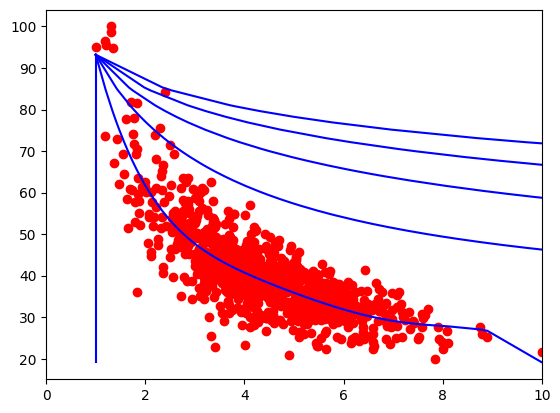

In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_columns,y_pred,color='blue')
plt.xlim(0,10)